<a href="https://colab.research.google.com/github/ck1972/University-GeoAI/blob/main/Module_2_Mastering_Machine_Learning_for_Geospatial_Challenges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Mastering Machine Learning for Geospatial Challenges
## What is Machine Learning?
- Artificial intelligence (AI) - the development of computer systems or software that can perform tasks typically requiring human intelligence

- Machine learning (ML) - computational methods that learn from data

- Deep learning (D)L - a subset of ML techniques that use deep artificial neural networks

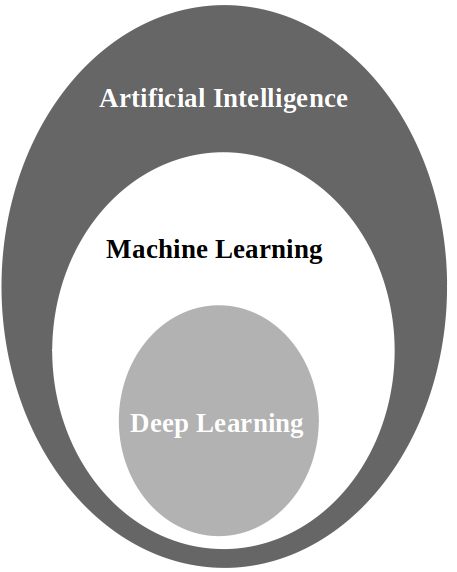

### Machine learning problems
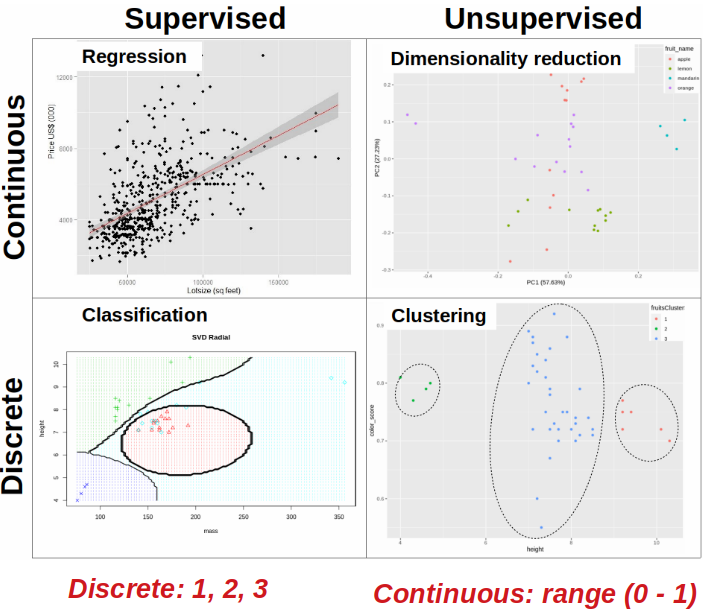

### Machine learning methods
#### Supervised
- Labeled data
- Predict output

#### Unsupervised
- Non-labeled data
- Discover patterns

#### Semi-supervised
- Labeled & non-labeled data
- Predict output

#### Reinforcement
- Agent performs task by trial & error
- Used in robotics


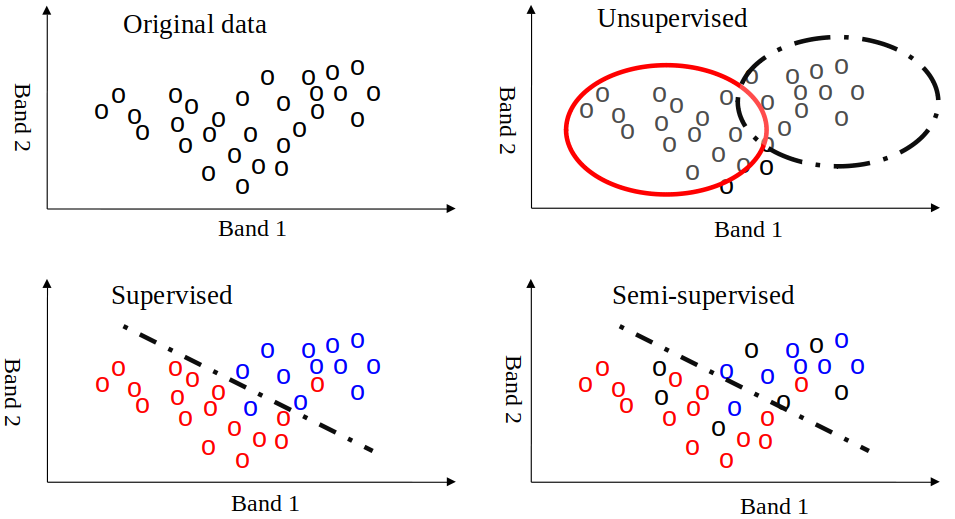

## Machine Learning Approach
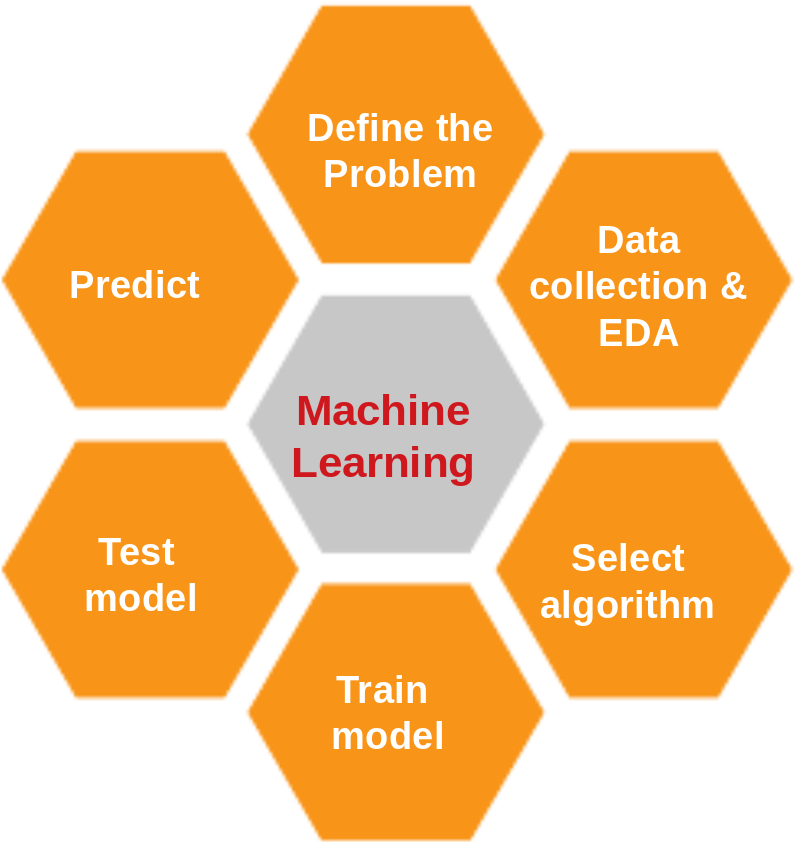

## Machine Learning Methods
## Introduction to Linear Regression
### Simple linear regression 1
- Problem:
Imagine you're trying to guess how much a pizza costs based on its size. You notice that bigger pizzas generally cost more money. Simple linear regression is like drawing the best straight line through a bunch of dots (your data points) to show this relationship. The line helps you predict the price of a pizza just by looking at its size.

- Formula:

$$f(x) = \sum_{i=1}^n m_i x_i + b$$

- Explanation:
f(x): The predicted value (like the pizza price we're trying to guess).

m: The slope of the line (how much the price changes when the size of the pizza changes).

x: The size of the pizza.

b: The intercept, or where the line crosses the starting point on the graph (this might represent the base cost of a pizza even if it's very small).




The predicted price for a 9-inch pizza is $6.50


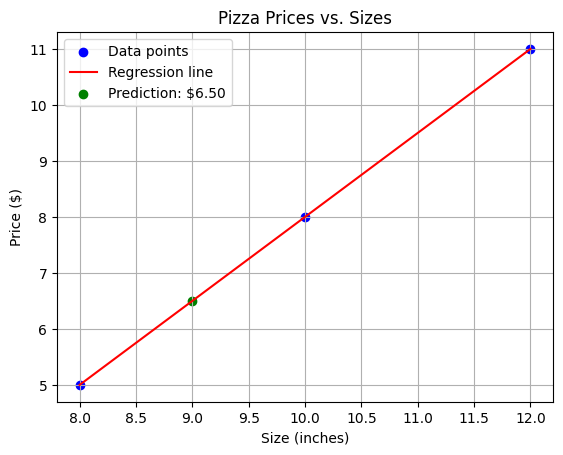

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data: sizes (in inches) and prices (in $)
pizza_sizes = np.array([8, 10, 12]).reshape(-1, 1)  # Features (independent variable)
# new_size = new_size_in_inches * 2.54  # Convert the new size to centimeters
pizza_prices = np.array([5, 8, 11])  # Target (dependent variable)

# Creating the Linear Regression model
model = LinearRegression()
model.fit(pizza_sizes, pizza_prices)  # Train the model on the data

# Making predictions
new_size = np.array([9]).reshape(-1, 1)  # Predict price for a 9-inch pizza
predicted_price = model.predict(new_size)

# Output the prediction
print(f"The predicted price for a 9-inch pizza is ${predicted_price[0]:.2f}")

# Plotting the data points and regression line
plt.scatter(pizza_sizes, pizza_prices, color='blue', label='Data points')  # Original data
plt.plot(pizza_sizes, model.predict(pizza_sizes), color='red', label='Regression line')  # Line of best fit

# Adding prediction to the plot
plt.scatter(new_size, predicted_price, color='green', label=f'Prediction: ${predicted_price[0]:.2f}')

# Labeling the plot
plt.title("Pizza Prices vs. Sizes")
plt.xlabel("Size (inches)")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### Simple linear regression 2
Below is a simple geographic example using housing prices instead of pizza prices, with synthetic data.

The predicted price for a 110 square meter house is $225.60k


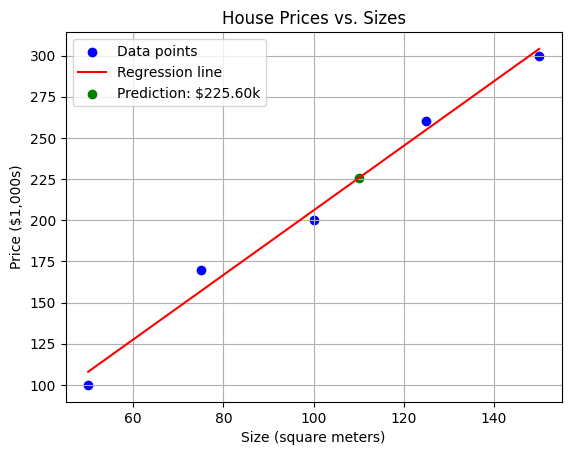

In [ ]:
# Data: House sizes (in square meters) and prices (in $1,000s)
house_sizes = np.array([50, 75, 100, 125, 150]).reshape(-1, 1)  # Features (independent variable)
house_prices = np.array([100, 170, 200, 260, 300])  # Target (dependent variable)

# Creating the Linear Regression model
model = LinearRegression()
model.fit(house_sizes, house_prices)  # Train the model on the data

# Making predictions
new_size = np.array([110]).reshape(-1, 1)  # Predict price for a 110 square meter house
predicted_price = model.predict(new_size)

# Output the prediction
print(f"The predicted price for a 110 square meter house is ${predicted_price[0]:.2f}k")

# Plotting the data points and regression line
plt.scatter(house_sizes, house_prices, color='blue', label='Data points')  # Original data
plt.plot(house_sizes, model.predict(house_sizes), color='red', label='Regression line')  # Line of best fit

# Adding prediction to the plot
plt.scatter(new_size, predicted_price, color='green', label=f'Prediction: ${predicted_price[0]:.2f}k')

# Labeling the plot
plt.title("House Prices vs. Sizes")
plt.xlabel("Size (square meters)")
plt.ylabel("Price ($1,000s)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## Machine Learning for Classification
### Import libraries
First, import the necessary libraries.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler

# Import machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC

## Data Preparation
To run the lab exercises for the different machine learning methods, we are going to create a synthetic dataset comprising forest and non-forest classes. We will normalize the dataset (range [0, 1]) and split into training and testing set.

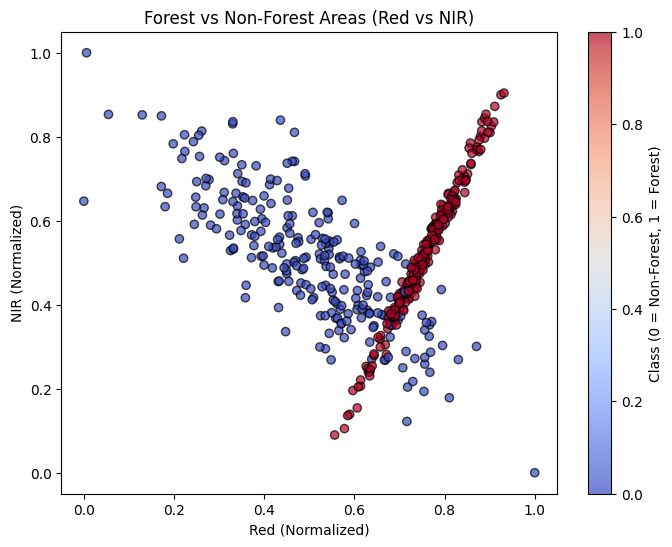

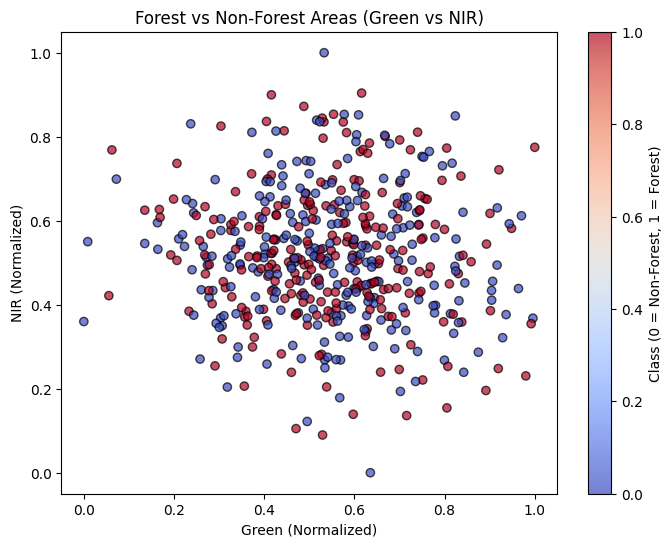

      Green       Red       NIR  Class
0  0.581227  0.788444  0.595671      1
1  0.337645  0.586252  0.378491      0
2  0.372091  0.851097  0.711539      1
3  0.605008  0.223380  0.804658      0
4  0.497955  0.766478  0.542586      1


In [ ]:
# Generate synthetic dataset
X, y = make_classification(n_samples=500, n_features=3, n_redundant=0, n_classes=2,
                           n_clusters_per_class=1, random_state=42)

# Convert into a DataFrame
data = pd.DataFrame(X, columns=['Green', 'Red', 'NIR'])
data['Class'] = y

# Normalize the features (Green, Red, NIR)
scaler = MinMaxScaler()
data[['Green', 'Red', 'NIR']] = scaler.fit_transform(data[['Green', 'Red', 'NIR']])

# Split into training and test sets
X = data[['Green', 'Red', 'NIR']].values
y = data['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualize the dataset in 2D (Red vs NIR)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1], X[:, 2], c=y, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.xlabel('Red (Normalized)')
plt.ylabel('NIR (Normalized)')
plt.title('Forest vs Non-Forest Areas (Red vs NIR)')
plt.colorbar(label='Class (0 = Non-Forest, 1 = Forest)')
plt.show()

# Visualize the dataset in 2D (Green vs NIR)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 2], c=y, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.xlabel('Green (Normalized)')
plt.ylabel('NIR (Normalized)')
plt.title('Forest vs Non-Forest Areas (Green vs NIR)')
plt.colorbar(label='Class (0 = Non-Forest, 1 = Forest)')
plt.show()

# Display the first few rows of the DataFrame
print(data.head())

## Function for decision boundaries
Next, we are going to define a helper function to plot the decision boundary for a 2D dataset. A decision boundary plot is essential in classification tasks as it visually demonstrates how a model distinguishes between different classes based on the input features. It shows the regions in the feature space where the model predicts one class versus another, allowing us to better understand how the model makes its decisions and how it handles different feature values.

In [ ]:
# Define a helper function to plot decision boundaries.
def plot_decision_boundary(model, X, y, title):
    """
    Plots the decision boundary for a 2D dataset.
    Parameters:
        model: Trained model (must have a predict method)
        X: Feature matrix (2D for visualization)
        y: Target values
        title: Title for the plot
    """
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Predict for each point in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.xlabel("Green")
    plt.ylabel("NIR")
    plt.title(title)
    plt.colorbar(label='Class (0 = Non-Forest, 1 = Forest)')
    plt.show()

## Logistic Regression
Logistic regression is a widely used statistical model for binary classification tasks, where the goal is to predict one of two possible outcomes based on input features. It estimates the probability of an event occurring through a logistic function (sigmoid function), which transforms a linear combination of input features into a value between 0 and 1, representing the probability of a particular class.

- Formula (Probability):

$$\text{Prob}(y=1) = \frac{1}{1 + e^{-(w_0 + \sum_{i=1}^n w_i x_i)}}$$

- Explanation
 Logistic regression predicts probabilities for binary classification. The S-shaped curve (sigmoid function) maps outputs to the range [0, 1].

Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        65
           1       0.85      0.89      0.87        85

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



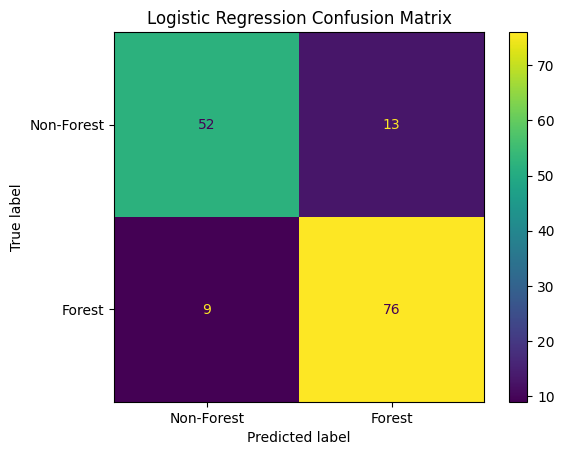

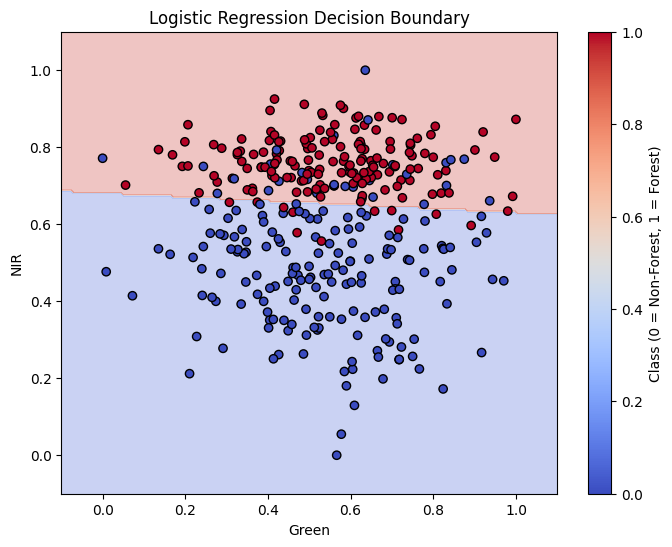

In [ ]:
# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train[:, :2], y_train)  # Use only the first two features (Green and Red)

# Predictions
y_pred_log = log_reg.predict(X_test[:, :2])

# Evaluation
print("Logistic Regression")
print(classification_report(y_test, y_pred_log))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log, display_labels=['Non-Forest', 'Forest'])
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Plot the decision boundary for Logistic Regression
plot_decision_boundary(log_reg, X_train[:, :2], y_train, "Logistic Regression Decision Boundary")

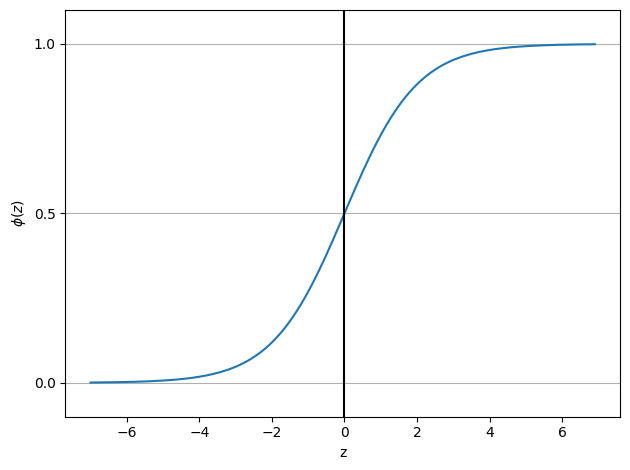

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
#plt.savefig('images/03_02.png', dpi=300)
plt.show()

## 3. K-Nearest Neighbors (KNN)

K-Nearest Neighbor (KNN) is a simple yet powerful algorithm used for classification tasks. It is a non-parametric, instance-based learning algorithm that classifies a new data point based on the majority class of its K nearest neighbors in the feature space. The "distance" between points is typically measured using Euclidean distance, although other distance metrics can be used depending on the problem. In the context of land cover classification, KNN can be applied to classify pixels of satellite images based on their spectral features (such as the green, red, and near-infrared bands). The model does not require an explicit training phase. Instead, it stores all the training data and performs classification at prediction time by evaluating the proximity of the query point to labeled points in the training set.

- Formula:
$$D(x_i, x_j) = \sqrt{(x_i - x_j)^2 + (y_i - y_j)^2}$$

- Explanation:

KNN calculates the Euclidean distance between data points.

It identifies the "K" nearest neighbors and predicts the target based on their majority vote (classification) or average value (regression).


K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        65
           1       0.82      0.82      0.82        85

    accuracy                           0.80       150
   macro avg       0.80      0.80      0.80       150
weighted avg       0.80      0.80      0.80       150



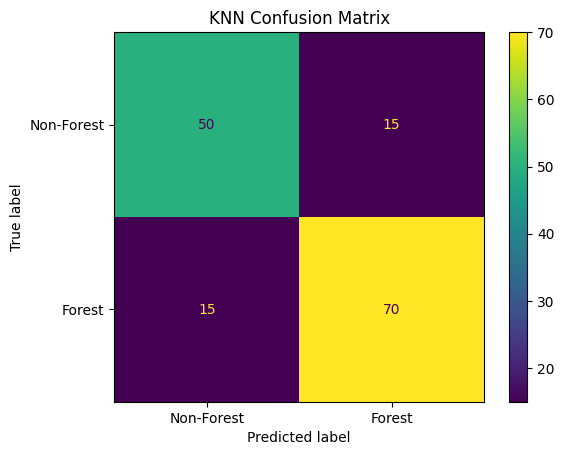

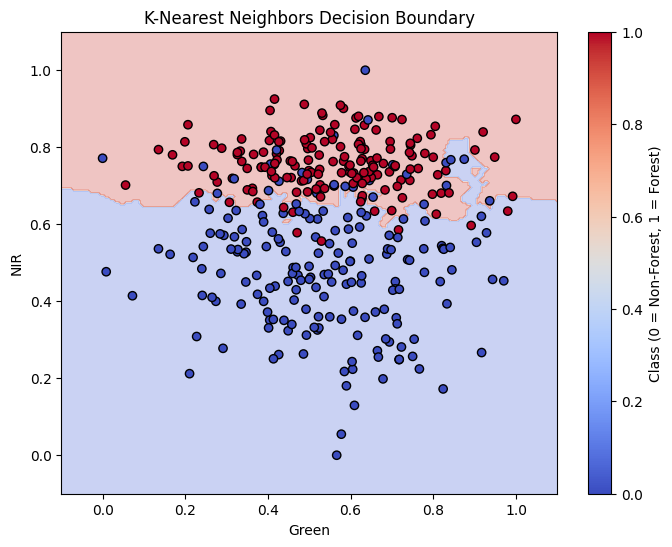

In [ ]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train[:, :2], y_train)

# Predictions
y_pred_knn = knn.predict(X_test[:, :2])

print("K-Nearest Neighbors")

print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, display_labels=['Non-Forest', 'Forest'])

# Plot the decision boundary for KNN
plt.title("KNN Confusion Matrix")
plt.show()
plot_decision_boundary(knn, X_train[:, :2], y_train, "K-Nearest Neighbors Decision Boundary")

## Support Vector Machines (SVM)

### SVM (Linear kernel)
- Formula:
$$f(x) = \text{sign}(w \cdot x + b)$$

- Explanation:

SVM separates classes using a hyperplane and maximizes the margin between classes.
Points on the margin are support vectors.

- Key components

- **Linear SVM Decision Function:**  

$$
f(x) = w \cdot x + b
$$  
where \( w \) is the weight vector, \( x \) is the input feature vector, and \( b \) is the bias term.

- **Optimal Hyperplane:**  
The hyperplane separates the classes with the **maximum margin**.

- **Margin Formula:**  

$$
\text{Margin} = \frac{2}{\|w\|}
$$  
The margin is inversely proportional to the norm of \( w \).

SVM (Linear Kernel)
              precision    recall  f1-score   support

           0       0.89      0.77      0.83        65
           1       0.84      0.93      0.88        85

    accuracy                           0.86       150
   macro avg       0.87      0.85      0.85       150
weighted avg       0.86      0.86      0.86       150



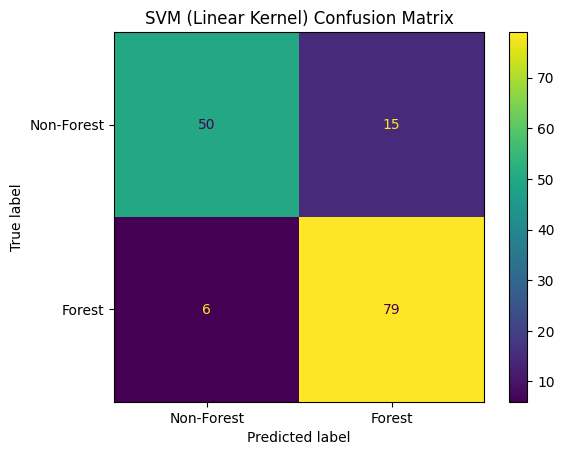

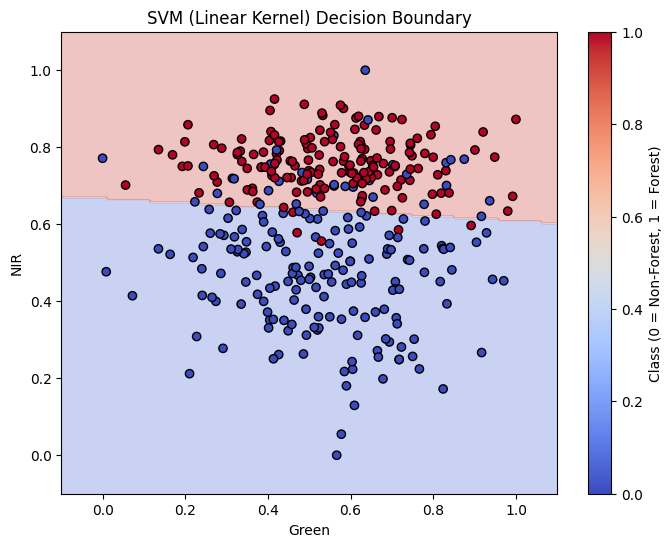

In [ ]:
# Initialize the Support Vector Machine (SVM) classifier with a linear kernel
svm_linear = SVC(kernel='linear', random_state=42)

# Train the SVM model using the first two features (likely spectral bands) from the training set (X_train) and the target labels (y_train)
svm_linear.fit(X_train[:, :2], y_train)

# Use the trained SVM model to make predictions on the test dataset using the first two features (X_test)
y_pred_svm_linear = svm_linear.predict(X_test[:, :2])

# Print a header to indicate that we are displaying results for SVM with a Linear Kernel
print("SVM (Linear Kernel)")

# Print the classification report, which includes metrics such as precision, recall, F1-score, and accuracy, comparing the true labels (y_test) with the predicted labels (y_pred_svm_linear)
print(classification_report(y_test, y_pred_svm_linear))

# Display the confusion matrix, showing the number of correct and incorrect predictions, with labels for 'Non-Forest' and 'Forest'
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm_linear, display_labels=['Non-Forest', 'Forest'])

# Set the title of the confusion matrix plot
plt.title("SVM (Linear Kernel) Confusion Matrix")

# Display the confusion matrix plot
plt.show()

# Plot the decision boundary for the SVM model using the first two features of the training data (X_train) and target labels (y_train)
# This shows how the linear SVM divides the feature space into different class regions
plot_decision_boundary(svm_linear, X_train[:, :2], y_train, "SVM (Linear Kernel) Decision Boundary")

### SVM (RBF kernel)
- **Radial Basis Function (RBF) Kernel:**  

$$
K(x_i, x_j) = \exp\left(-\frac{\|x_i - x_j\|^2}{2\sigma^2}\right)
$$  
The RBF kernel computes similarity between two points \( x_i \) and \( x_j \) using a Gaussian function.

- **Final Decision Rule:**  

$$
\hat{y} = \text{sign}\left(w \cdot x + b\right)
$$  
The prediction depends on the sign of the decision function.


SVM (RBF Kernel)
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        65
           1       0.85      0.91      0.88        85

    accuracy                           0.85       150
   macro avg       0.86      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



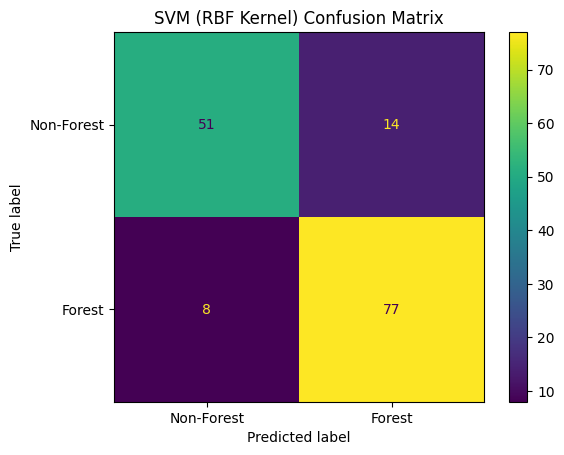

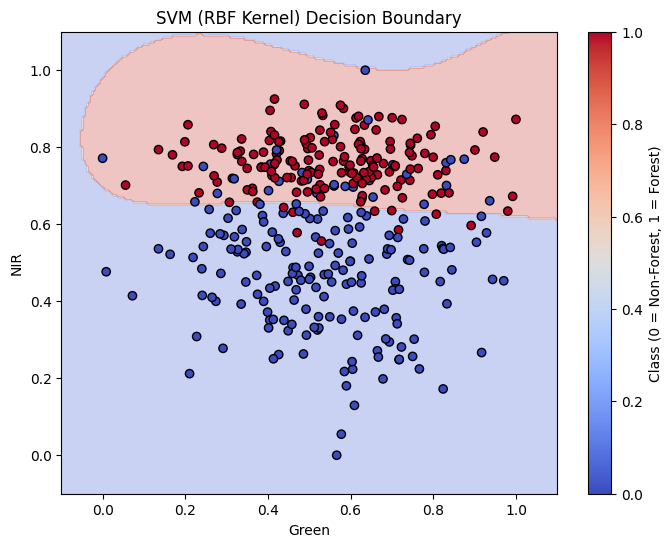

In [ ]:
# Support Vector Machine (RBF Kernel)
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train[:, :2], y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test[:, :2])
print("SVM (RBF Kernel)")
print(classification_report(y_test, y_pred_svm_rbf))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm_rbf, display_labels=['Non-Forest', 'Forest'])
plt.title("SVM (RBF Kernel) Confusion Matrix")
plt.show()
plot_decision_boundary(svm_rbf, X_train[:, :2], y_train, "SVM (RBF Kernel) Decision Boundary")

##### Key mathematical concepts
- Support vectors - Points closest to the hyperplane, determining its position.
- Margin - Maximum distance between the hyperplane and support vectors.
- Kernel function - Enables SVM to handle nonlinear problems by mapping data to higher dimensions.

##### Advantages of SVM
- Effective for high-dimensional spaces.
- Works well when the number of dimensions is greater than the number of samples.
- Flexible through kernel functions.

##### Limitations of SVM
- Computationally expensive for large datasets.
- Performance depends on proper selection of the kernel and hyperparameters

##  Decision Trees (DT)
### DT Gini impurity
- formula:
$$Gini = 1 - \sum_{i=1}^C p_i^2$$

- Explanation:

Gini impurity measures the likelihood of incorrectly classifying a randomly chosen element.
p: probability of class i.
Used in decision tree splits to measure purity.

### DT Entropy
- Formula
$$Entropy = -\sum_{i=1}^C p_i \log_2(p_i)$$

- Explanation:

Entropy measures the amount of information or disorder.
Information Gain (IG) is used to select the best split in decision trees.

Decision Tree
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        65
           1       0.83      0.91      0.87        85

    accuracy                           0.84       150
   macro avg       0.84      0.83      0.83       150
weighted avg       0.84      0.84      0.84       150



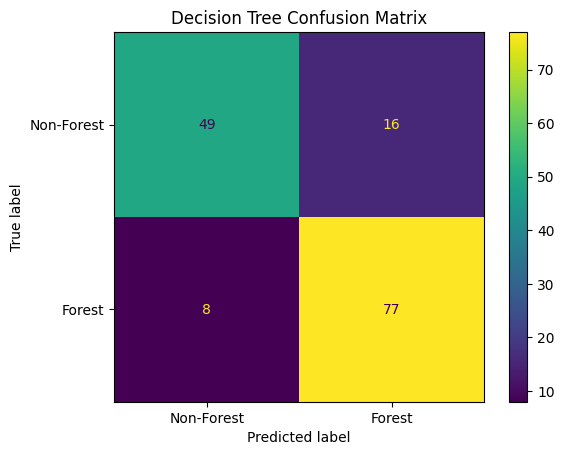

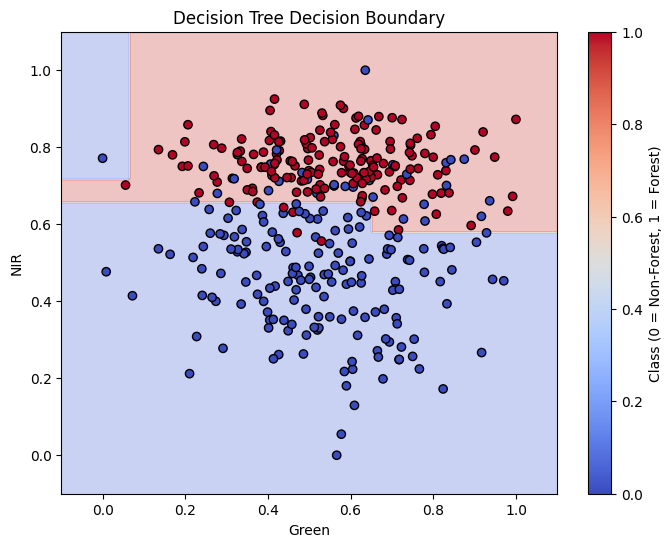

In [ ]:
# Decision Tree
# Initialize the Decision Tree classifier with a maximum depth of 3 and a random seed for reproducibility
# The 'max_depth=3' argument limits the depth of the tree to avoid overfitting by ensuring that the tree doesn't become too complex
tree = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the Decision Tree model using the first two features from the training data (X_train) and the target labels (y_train)
tree.fit(X_train[:, :2], y_train)

# Use the trained Decision Tree model to make predictions on the test data (X_test) using the first two features
y_pred_tree = tree.predict(X_test[:, :2])

# Print a header to indicate that the results for the Decision Tree are being displayed
print("Decision Tree")

# Print the classification report, which includes key metrics such as precision, recall, F1-score, and accuracy
# The classification report compares the true labels (y_test) with the predicted labels (y_pred_tree) to evaluate the model's performance
print(classification_report(y_test, y_pred_tree))

# Display the confusion matrix, showing the number of correct and incorrect predictions for each class (Non-Forest and Forest)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, display_labels=['Non-Forest', 'Forest'])

# Set the title of the confusion matrix plot to indicate it is for the Decision Tree model
plt.title("Decision Tree Confusion Matrix")

# Display the confusion matrix plot
plt.show()

# Plot the decision boundary for the Decision Tree model using the first two features from the training data (X_train)
# and the corresponding target labels (y_train) to visualize how the model separates the classes in the feature space
plot_decision_boundary(tree, X_train[:, :2], y_train, "Decision Tree Decision Boundary")


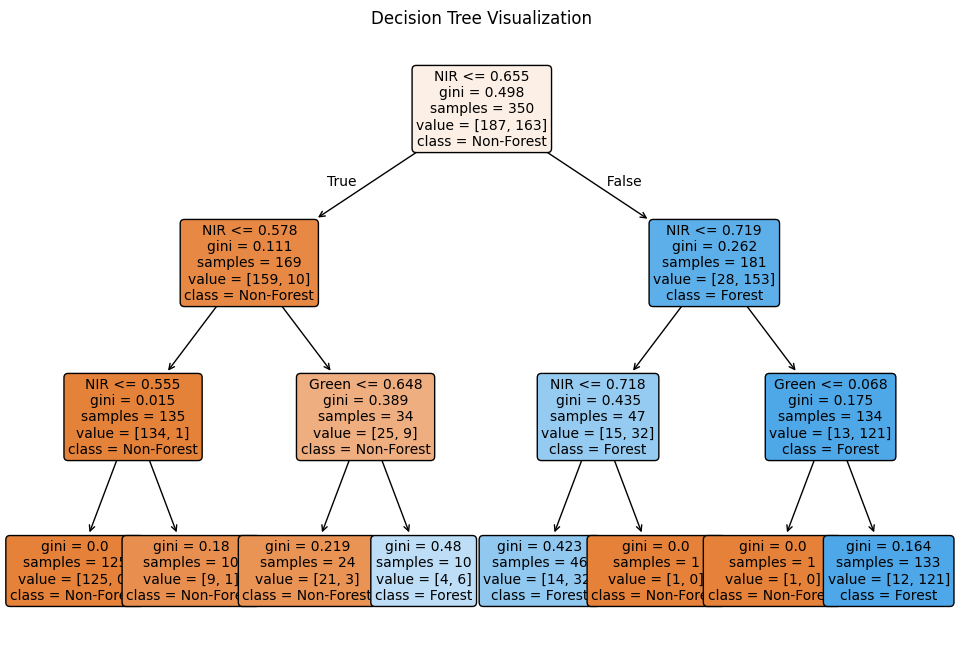

In [ ]:
# Importing required libraries
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Decision Tree Visualization
plt.figure(figsize=(12, 8))
plot_tree(
    tree,
    feature_names=['Green', 'NIR'],  # Feature names used for training
    class_names=['Non-Forest', 'Forest'],  # Class names for labels
    filled=True,  # Fill the nodes with color
    rounded=True,  # Use rounded edges for nodes
    fontsize=10,  # Font size for text
)
plt.title("Decision Tree Visualization")
plt.show()

## Random Forest
- Formula:
$$f(x) = \frac{1}{T} \sum_{t=1}^T h_t(x)$$

- Key components

- **$\mathbf{T}$:**  
  The **number of trees** in the Random Forest model.  

- **$\mathbf{h_t(x)}$:**  
  The **prediction by tree \( t \)**. Each tree \( h_t(x) \) provides an independent prediction.  


- **Final prediction (Classification):**  

$$
\hat{y} = \text{Majority Vote}\left(h_1(x), h_2(x), \dots, h_T(x)\right)
$$  
The final prediction is obtained by taking the majority vote of all \( T \) trees.

- **Final prediction (Regression):**  

$$
\hat{y} = \frac{1}{T} \sum_{t=1}^T h_t(x)
$$  
For regression, the final prediction is the **average** of predictions from all \( T \) trees.

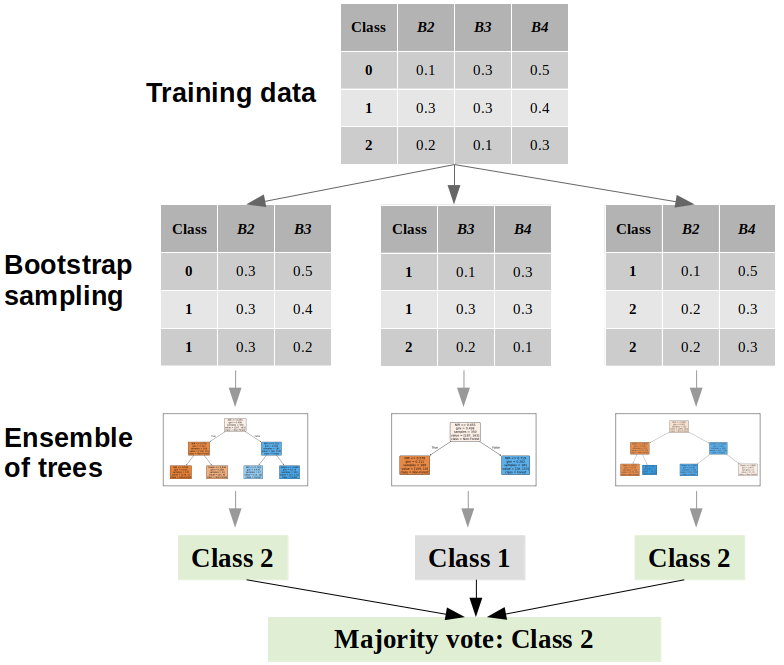

Random Forest
              precision    recall  f1-score   support

           0       0.81      0.78      0.80        65
           1       0.84      0.86      0.85        85

    accuracy                           0.83       150
   macro avg       0.82      0.82      0.82       150
weighted avg       0.83      0.83      0.83       150



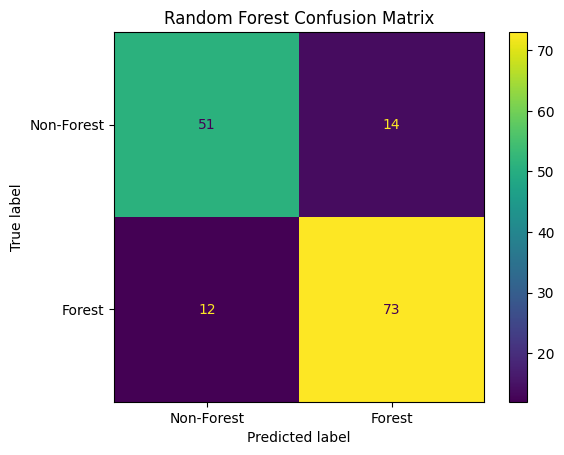

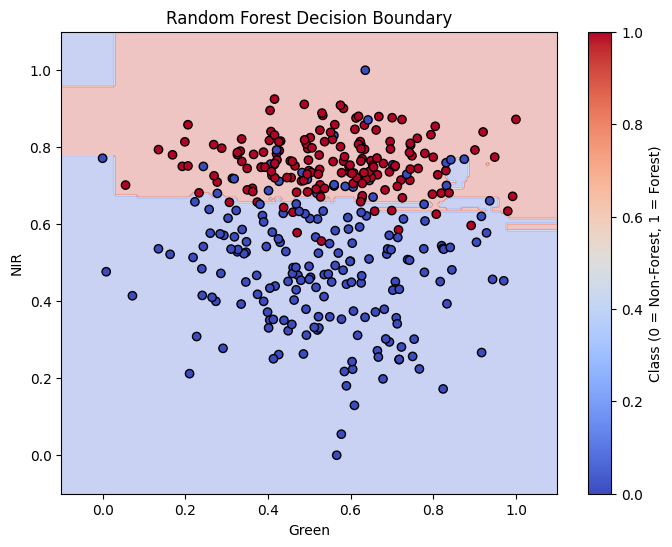

In [ ]:
# Initialize the Random Forest classifier with 100 trees, a maximum depth of 5, and a fixed random seed for reproducibility
# 'n_estimators=100' means the forest will have 100 decision trees
# 'max_depth=5' limits the depth of each tree to prevent overfitting
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Train the Random Forest model using the first two features from the training data (X_train) and the target labels (y_train)
rf.fit(X_train[:, :2], y_train)

# Use the trained Random Forest model to make predictions on the test dataset (X_test) using the first two features
y_pred_rf = rf.predict(X_test[:, :2])

# Print a header to indicate the results for the Random Forest model
print("Random Forest")

# Print the classification report, which includes key metrics such as precision, recall, F1-score, and accuracy
# It compares the true labels (y_test) with the predicted labels (y_pred_rf)
print(classification_report(y_test, y_pred_rf))

# Display the confusion matrix to show the number of correct and incorrect predictions for each class (Non-Forest and Forest)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=['Non-Forest', 'Forest'])

# Set the title of the confusion matrix plot to indicate it is for the Random Forest model
plt.title("Random Forest Confusion Matrix")

# Display the confusion matrix plot
plt.show()

# Plot the decision boundary for the Random Forest model using the first two features from the training data (X_train)
# and the corresponding target labels (y_train) to visualize how the model separates the classes in the feature space
plot_decision_boundary(rf, X_train[:, :2], y_train, "Random Forest Decision Boundary")


### Main challenges
- Lack of adequate training data
- Non-representative training data (bias)
- Poor quality data
- Irrelevant features or attributes
- Overfitting the training data
- Underfitting the training data

### Error due to bias
- The difference betwwen the expected average and correct value
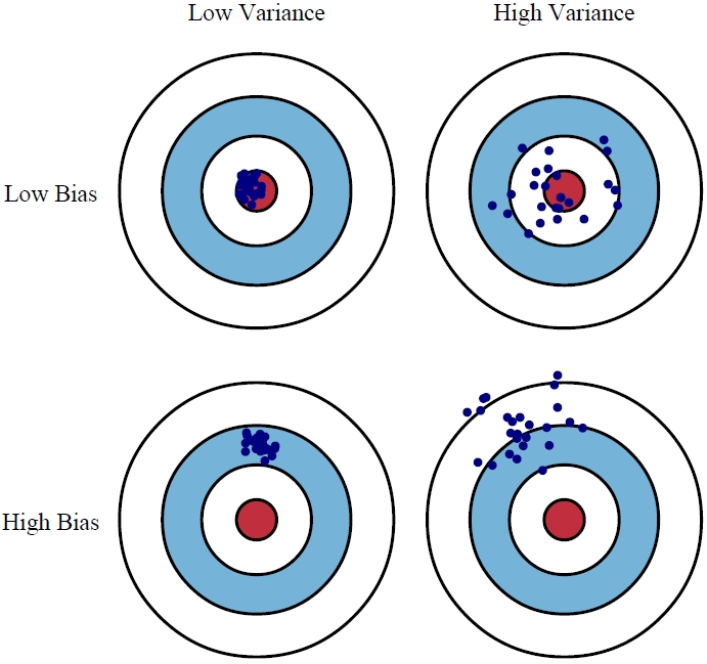

### Error due to variance
- How much the predictions for a given point vary between different model runs
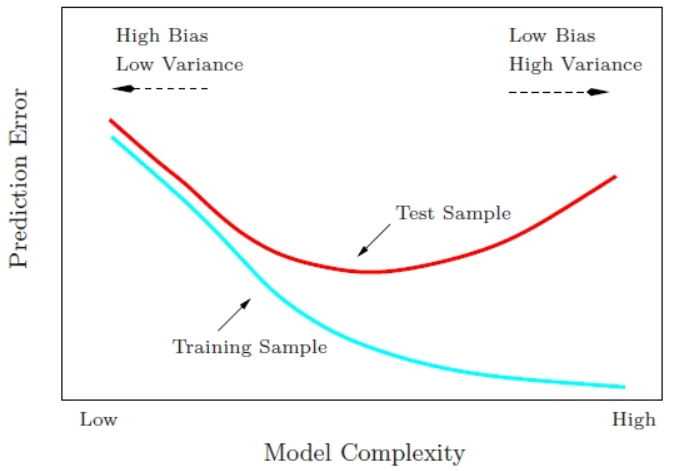

### The best ML algorithm!!
- Thousands of ML algorithms!!

- So which is the best model??

- The “No Free Lunch” Theorem!!!! - no one super model

- Better to try multiple models

- Find one that works best for a given problem

## Summary
This modeule focused on:
- What is machine learning (ML)?

- ML approach and process

- Supervised ML methods (logistic regression, KNN, DT, RF & SVMs)

- ML models are opaque (black-box)

- Hence, the need for explainable ML!!